In [1]:
# Adding src module to path
import sys
import os
from tqdm import tqdm
module_path = os.path.abspath(os.path.join('../..'))

print(f"module path {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)


module path C:\Users\overs\Python\Master-Thesis-Project


In [2]:
# general imports
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced, RandomHamiltonian


## Testing hidden node accuracy

Training several RBMs with increasing number of visible nodes. For each RBM we test how increasing the number of hidden nodes affects accuracy.

In [4]:

#Initializing starting values 
visible_size = 2
seed = 42

#Finding true ground state energy and displaying it
np.random.seed(seed)

energy_list=[]
true_energy_list=[]
time_list = []

for v in [4,5,6]:
    
            
    np.random.seed(seed)


    rh = RandomHamiltonian(n=v)

    
    eig,_ = np.linalg.eigh(rh)
    E_truth = np.min(eig)
    true_energy_list.append(E_truth)

    
    energies=[]
    times = []
    labels = []
    for i in tqdm(range(1, 8)): 
        visible_size = v
        hidden_size = i*2
        
        np.random.seed(seed)

        rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=rh, walker_steps=1000)

        energies.append(rbm.train(iterations=1000, lr=0.01, print_energy=False))
        time_list.append(rbm.train.run_time)

        labels.append([f"Hidden size = {hidden_size}"])
        
    
        # Print loop    
    
    
    energy_list.append(energies)


 14%|███████████▊                                                                       | 1/7 [05:24<32:24, 324.04s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B824BA160>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 324.040652513504 sec


 29%|███████████████████████▋                                                           | 2/7 [11:01<27:38, 331.79s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026BFFF6D3D0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 337.20818972587585 sec


 43%|███████████████████████████████████▌                                               | 3/7 [16:51<22:40, 340.18s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8001F220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 350.154568195343 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [22:50<17:23, 347.68s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026BFFF9A7C0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 359.17725467681885 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [28:58<11:50, 355.12s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82BD8640>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 368.3135669231415 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [35:13<06:01, 361.84s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026BFFF6D3D0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 374.8807466030121 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [41:30<00:00, 355.74s/it]


func:train args:[(<src.nqs.RBM object at 0x0000026B8001F220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 376.406044960022 sec


 14%|███████████▊                                                                       | 1/7 [06:26<38:40, 386.68s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CEDA00>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 386.6787579059601 sec


 29%|███████████████████████▋                                                           | 2/7 [13:09<33:01, 396.27s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8001F220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 402.98132824897766 sec


 43%|███████████████████████████████████▌                                               | 3/7 [20:07<27:03, 405.97s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CEDF10>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 417.5192108154297 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [27:10<20:38, 412.81s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8001F340>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 423.28222608566284 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [34:23<14:00, 420.03s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CEDA00>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 432.8225932121277 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [41:50<07:09, 429.13s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8001F220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 446.8165748119354 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [49:36<00:00, 425.22s/it]


func:train args:[(<src.nqs.RBM object at 0x0000026B82CED340>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 466.4342885017395 sec


 14%|███████████▊                                                                       | 1/7 [06:55<41:31, 415.26s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8001F220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 415.26129388809204 sec


 29%|███████████████████████▋                                                           | 2/7 [14:01<35:08, 421.71s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8002B7F0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 426.22745871543884 sec


 43%|███████████████████████████████████▌                                               | 3/7 [21:41<29:16, 439.09s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B8002B1C0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 459.7691810131073 sec


 57%|███████████████████████████████████████████████▍                                   | 4/7 [29:45<22:50, 456.77s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82BD8220>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 483.868257522583 sec


 71%|███████████████████████████████████████████████████████████▎                       | 5/7 [38:17<15:53, 476.93s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CEDAC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 512.6853423118591 sec


 86%|███████████████████████████████████████████████████████████████████████▏           | 6/7 [47:15<08:17, 497.68s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CED3D0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 537.9477562904358 sec


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [56:42<00:00, 486.05s/it]

func:train args:[(<src.nqs.RBM object at 0x0000026B82CEDAC0>,), {'iterations': 1000, 'lr': 0.01, 'print_energy': False}] took: 566.5888907909393 sec


<IPython.core.display.Javascript object>


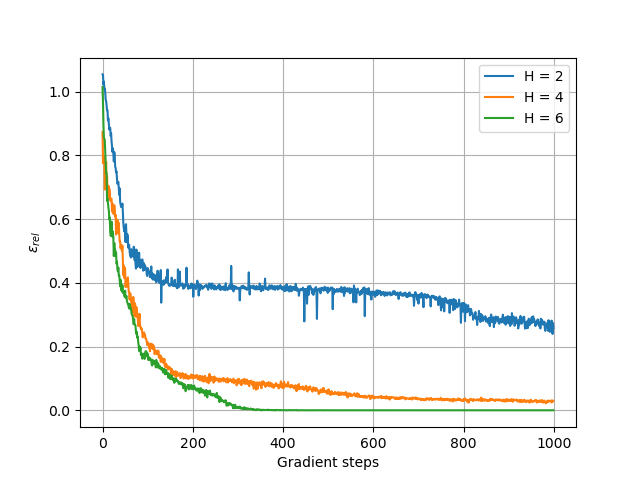

In [23]:
labels = [f"H = {i}" for i in range(2, 17, 2)]
run = 0
plt.figure(run)
for energy in [energy_list[run][i] for i in [0,1,2]]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend([labels[i] for i in [0,1,2]])








In [24]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/RandomHidden_sizeV4.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

<IPython.core.display.Javascript object>


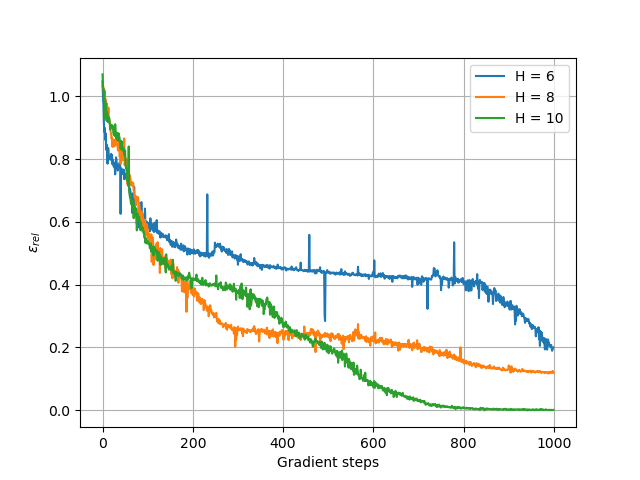

In [25]:
run = 1
plt.figure(run)

selection = [2,3,4]

for energy in [energy_list[run][i] for i in selection]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend([labels[i] for i in selection])




In [27]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/RandomHidden_sizeV5.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

<IPython.core.display.Javascript object>


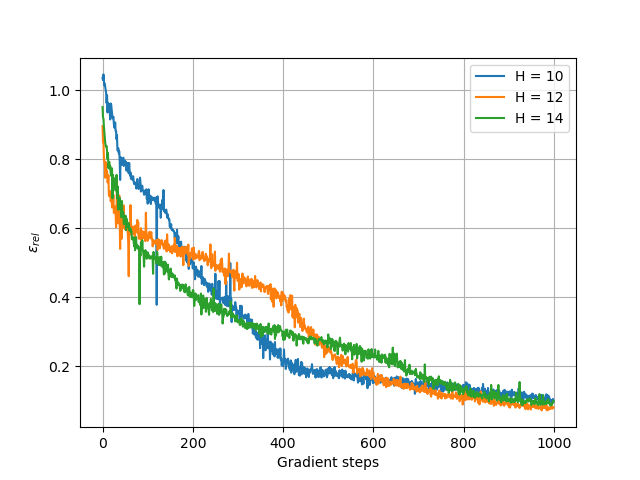

In [22]:

run = 2
plt.figure(run)
selection = [4,5,6]

for energy in [energy_list[run][i] for i in selection]:
    plt.plot((energy-true_energy_list[run])/np.abs(true_energy_list[run]))
    
plt.xlabel("Gradient steps")
plt.ylabel(r'$\epsilon_{rel}$')
plt.grid()
plt.legend([labels[i] for i in selection])


In [64]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/Hidden_sizeV6.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")